In [77]:
#Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#Create dataframe from csv file
exposure = pd.read_csv('Data for model.csv')
exposure.head()

,year,Annual,ClimateZone,Precip05in,Precip1in,Snow10in,Temp90,FC_Min,FC_Max,PrincArt,...,HseHldH,WalkComH,TransComH,DegreeH,NoVehH,WalkComPctH,TransComPctH,NonWhitePctH,DegreePctH,NoVehPctH
0,2014,1.008715e+05,3,160,55,0.0,4.0,4,7,1,...,3442.366473,166.738041,1018.284763,1099.640883,947.562614,0.044633,0.272576,0.226225,0.193205,0.275265
1,2014,1.160158e+06,3,160,55,0.0,4.0,3,3,2,...,3162.386495,158.532153,773.437362,1590.916415,508.269792,0.036902,0.180034,0.326323,0.264586,0.160723
2,2014,5.230030e+05,3,160,55,0.0,4.0,3,7,1,...,4858.992498,916.155792,1430.823715,2858.854956,805.819303,0.155156,0.242317,0.723288,0.373215,0.165841
3,2014,5.453961e+05,3,160,55,0.0,4.0,3,7,1,...,2755.337596,111.032411,383.858091,721.283123,147.926427,0.026330,0.091027,0.348611,0.119821,0.053687
4,2014,1.303617e+05,3,160,55,0.0,4.0,3,4,1,...,1338.560970,22.904996,44.223395,574.407818,65.102869,0.017433,0.033658,0.334453,0.208903,0.048636


In [79]:
#Select variables & check mean, std dev., min, & max value.
df = exposure[['Annual', 'Int4way','Snow10in', 'SchoolsH', 'Signal', 'MaxSlope', 'DistWater', 'AllTransitH','Jobs30H', 'PopT', 'HseHldT']]
df.describe()

,Annual,Int4way,Snow10in,SchoolsH,Signal,MaxSlope,DistWater,AllTransitH,Jobs30H,PopT,HseHldT
count,1.301000e+03,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1.301000e+03,1301.000000,1301.000000
mean,7.328024e+05,0.694081,0.212452,1.882398,0.490392,0.023807,1.980016,5.669776,9.730359e+05,237.709650,100.184327
std,2.029549e+06,0.460973,1.013796,1.874322,0.500100,0.024613,1.655286,3.105202,1.733345e+06,259.902302,136.624799
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.003734,0.000000,0.000000e+00,0.000000,0.000000
25%,3.550104e+04,0.000000,0.000000,0.000000,0.000000,0.007500,0.798467,3.099828,6.017384e+03,66.095605,22.784028
50%,1.434238e+05,1.000000,0.000000,1.000000,0.000000,0.015300,1.627496,6.498840,1.591286e+05,167.359809,62.247033
75%,5.436381e+05,1.000000,0.000000,3.000000,1.000000,0.030900,2.769870,8.408637,1.064683e+06,334.644143,126.922017
max,2.579122e+07,1.000000,5.600000,9.000000,1.000000,0.203100,15.041856,9.986393,1.050488e+07,3799.904870,2020.496597


C:\Users\ipsita\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


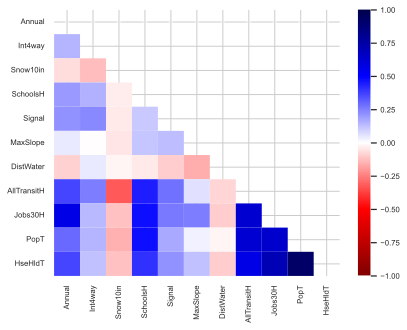

In [80]:
#Create heatmap of correlations among the variables
sns.set(context='notebook', style='whitegrid', font_scale=0.7)
upper = np.triu(df.corr())  # Here, we are looking at the upper triangle. Optionally, you can just look at the lower triangle. 
sns.heatmap(df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);
plt.savefig('heatmap.png')

In [85]:
#Splitting into training & test data
X_train, X_test, y_train, y_test = train_test_split(df[['Int4way', 'Snow10in', 'SchoolsH', 'Signal', 'MaxSlope', 'DistWater', 'AllTransitH','Jobs30H', 'PopT', 'HseHldT']], df['Annual'], test_size=0.33, random_state=42)

In [86]:
# Add a constant to the independent variables
X1 = sm.add_constant(X_train)

# Fit the linear regression model
lr_model = sm.OLS(y_train, X1).fit()

#print model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Annual   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     41.70
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.52e-67
Time:                        14:53:19   Log-Likelihood:                -13605.
No. Observations:                 871   AIC:                         2.723e+04
Df Residuals:                     860   BIC:                         2.728e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.551e+04   1.62e+05      0.527      

In [87]:
# Add a constant to the independent variables
X = sm.add_constant(X_train)

# Fit the Poisson regression model
poisson_model = sm.GLM(y_train, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Annual   No. Observations:                  871
Model:                            GLM   Df Residuals:                      860
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7231e+08
Date:                Tue, 11 Feb 2025   Deviance:                   5.4460e+08
Time:                        14:53:20   Pearson chi2:                 8.82e+08
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.4510      0.000   3.84e+04      

In [88]:
# Add a constant to the independent variables
X = sm.add_constant(X_train)

# Fit the Poisson regression model
model = sm.GLM(y_train, X, family=sm.families.NegativeBinomial(alpha = 1)).fit()

# Print the model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Annual   No. Observations:                  871
Model:                            GLM   Df Residuals:                      860
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11762.
Date:                Tue, 11 Feb 2025   Deviance:                       1841.8
Time:                        14:53:20   Pearson chi2:                 2.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.8282
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.3378      0.110     94.209      